In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('salary.csv')
data.shape

(32561, 15)

## Data preparation & EDA

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [7]:
data.duplicated().sum()

24

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
data['native-country'].dtype

dtype('O')

In [10]:
# 1. getting rid of the spaces

data['native-country'] = data['native-country'].str.strip()

# 2. replace country names with the correct ones

data['native-country'] = data['native-country'].replace(["Holand-Netherlands","Trinadad&Tobago", "Outlying-US(Guam-USVI-etc)", "Hong", "South"],
                                                        ['Netherlands',"Trinidad and Tobago", "Outlying-US", "Hong Kong", "South Korea"])

In [11]:
data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South Korea', 'Puerto-Rico', 'Honduras', 'England', 'Canada',
       'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia',
       'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti',
       'Portugal', 'Dominican-Republic', 'El-Salvador', 'France',
       'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US',
       'Scotland', 'Trinidad and Tobago', 'Greece', 'Nicaragua',
       'Vietnam', 'Hong Kong', 'Ireland', 'Hungary', 'Netherlands'],
      dtype=object)

In [12]:
# how much data in country column is missing

round(data[data['native-country'] == '?'].shape[0] * 100 / data.shape[0], 2)

1.79

In [13]:
# how much data in country column is missing

round(data[data['native-country'] == '?'].shape[0] * 100 / data.shape[0], 2)

1.79

In [14]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [15]:
# cleaning the white spaces in one line for entire dataset

data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [16]:
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

In [17]:
data['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [18]:
# replacing salary value with 1 and o


data['salary'] = data['salary'].replace(['<=50K', '>50K'],[0,1])

In [19]:
high_salary = data[data['salary'] == 1]
low_salary = data[data['salary'] == 0]

# EDA

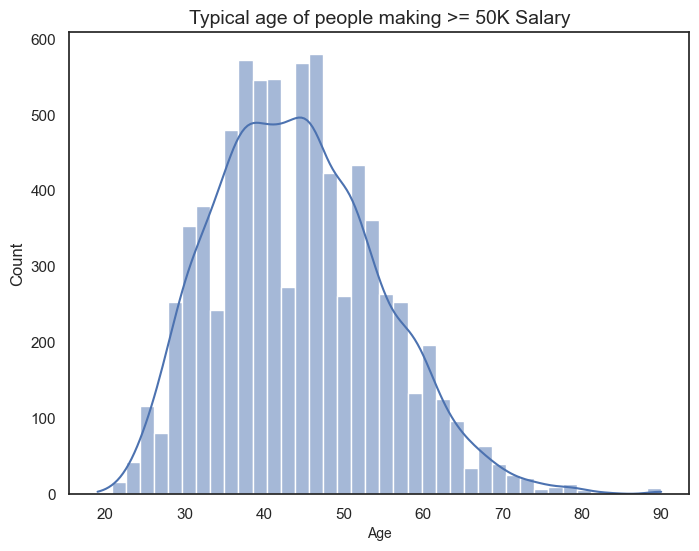

In [20]:
sns.set()
sns.set_style('white')

plt.figure(figsize=(8,6))
sns.histplot(high_salary['age'], kde=True, bins = 40)
plt.title('Typical age of people making >= 50K Salary', size=14)
plt.xlabel('Age',size=10)
plt.show()

In [21]:
sns.set(rc={"axes.facecolor":"#F0E9D2","figure.facecolor":"#F0E9D2"})

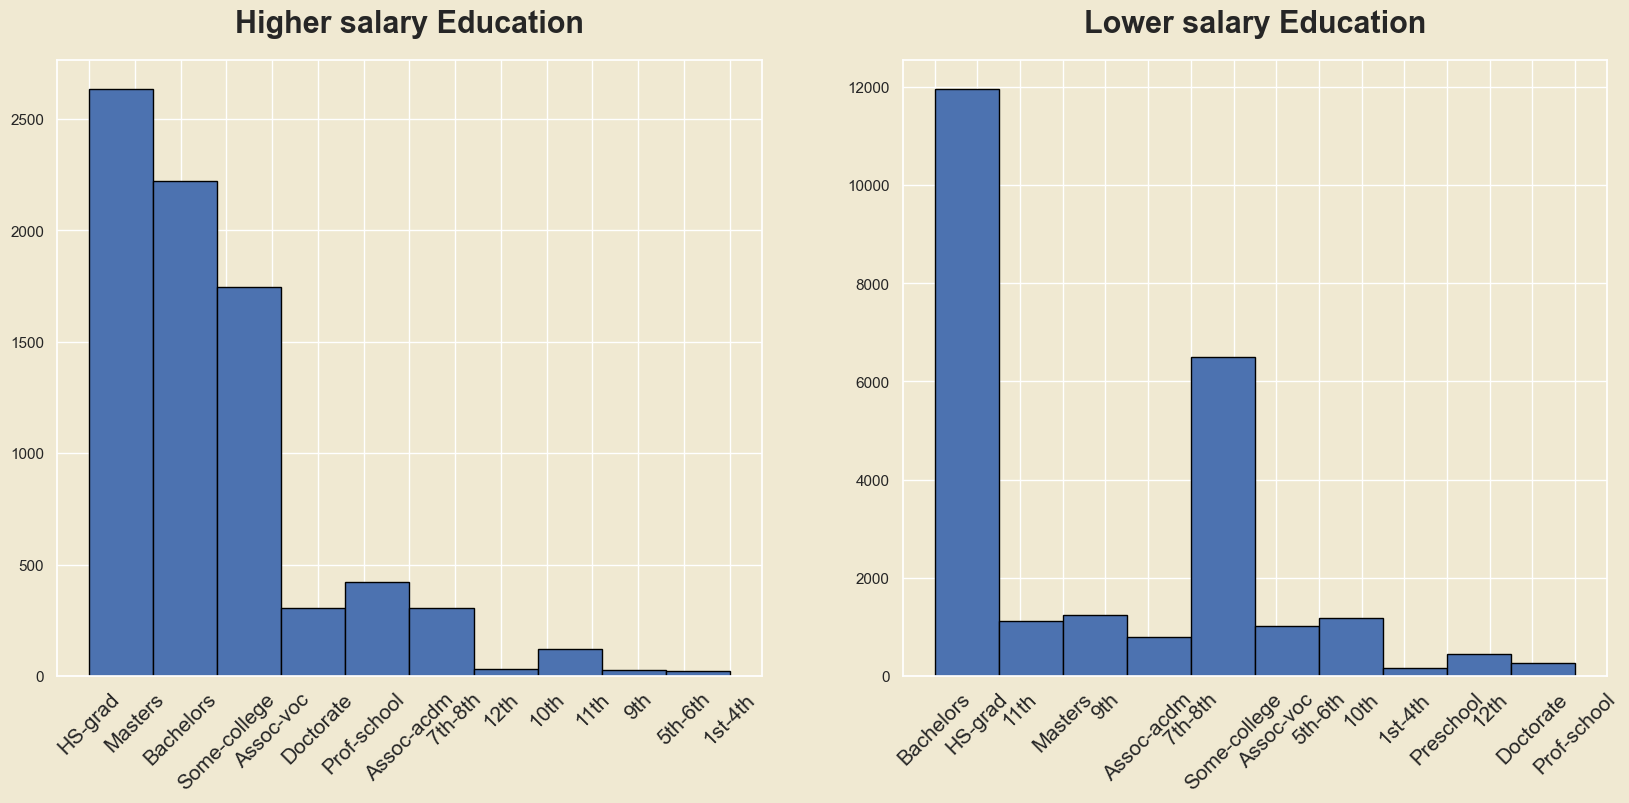

In [22]:
# doubling sns style as it doesn't always work with the first load
sns.set(rc={"axes.facecolor":"#F0E9D2","figure.facecolor":"#F0E9D2"})

# Plot typical education for higher and lower salary making people

plt.figure(figsize=[20, 8])

# 1 Chart: higher salary
plt.subplot(1, 2, 1)

plt.hist(high_salary['education'], edgecolor='black')

plt.xticks(rotation=45, size=15)
plt.title('Higher salary Education', fontsize=22, fontweight='bold', pad=20)



# 2 Chart: lower salary
plt.subplot(1, 2, 2)

order = []
plt.hist(low_salary['education'], edgecolor='black')

plt.xticks(rotation=45, size=15)
plt.title('Lower salary Education', fontsize=22,fontweight='bold', pad=20)
plt.xlabel(None)



plt.show()

In [23]:
# sns.pairplot(data, hue='sex')
# plt.show()

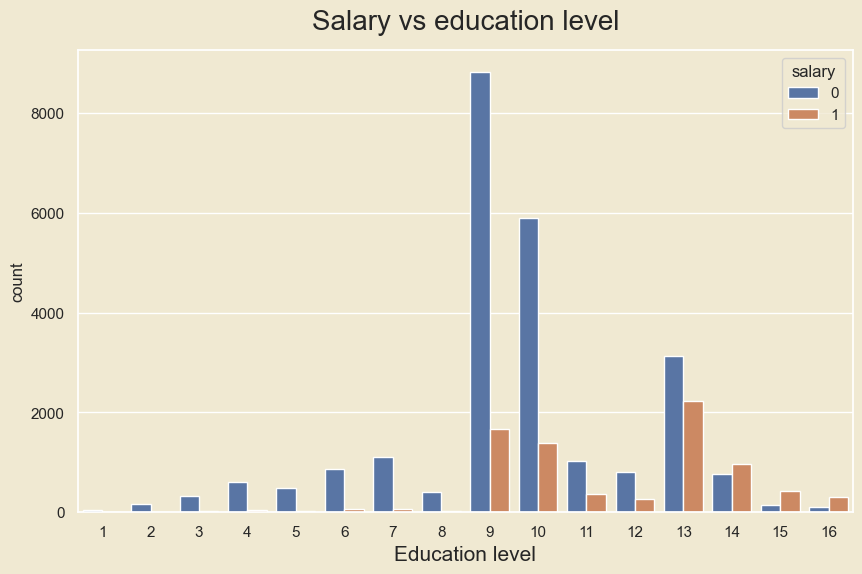

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data, x = 'education-num', hue = 'salary')
plt.title("Salary vs education level", size = 20, pad=15)
plt.xlabel('Education level', size = 15)
plt.show()

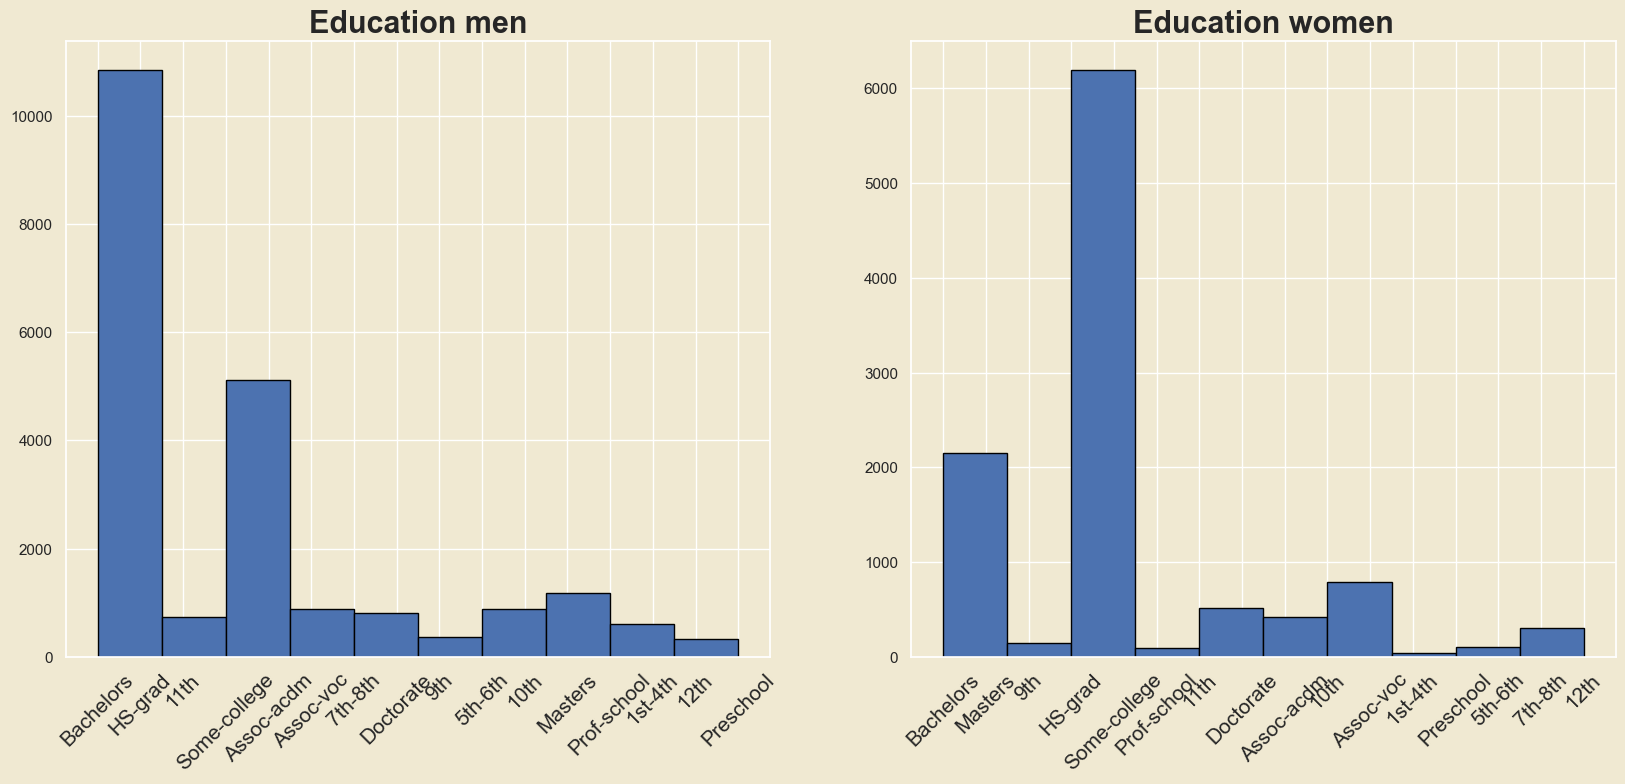

In [25]:
men = data[data['sex'] == 'Male']
women = data[data['sex'] == 'Female']


plt.figure(figsize=[20, 8])

# 1 Chart: higher salary
plt.subplot(1, 2, 1)

plt.hist(men['education'], edgecolor='black')

plt.xticks(rotation=45, size=15)
plt.title('Education men', fontsize=22, fontweight='bold')



# 2 Chart: lower salary
plt.subplot(1, 2, 2)


plt.hist(women['education'], edgecolor='black')

plt.xticks(rotation=45, size=15)
plt.title('Education women', fontsize=22,fontweight='bold')
plt.xlabel(None)



plt.show()

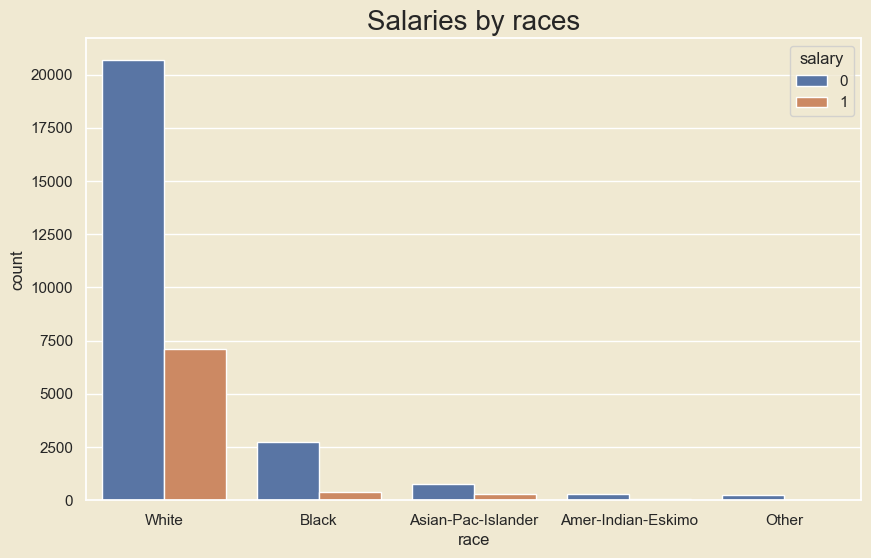

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data, x = 'race', hue = 'salary')
plt.title('Salaries by races', size = 20)
plt.show()

In [27]:
data.corr().head().style.set_properties(**{'background-color':'#1c4954',
                                       'color': '#d4d1b4',
                                       'border': '1.5px solid black'})

C:\Users\HP\AppData\Local\Temp\ipykernel_12956\2874041098.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().head().style.set_properties(**{'background-color':'#1c4954',


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501


C:\Users\HP\AppData\Local\Temp\ipykernel_12956\1503896051.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = round(data.corr(),2)


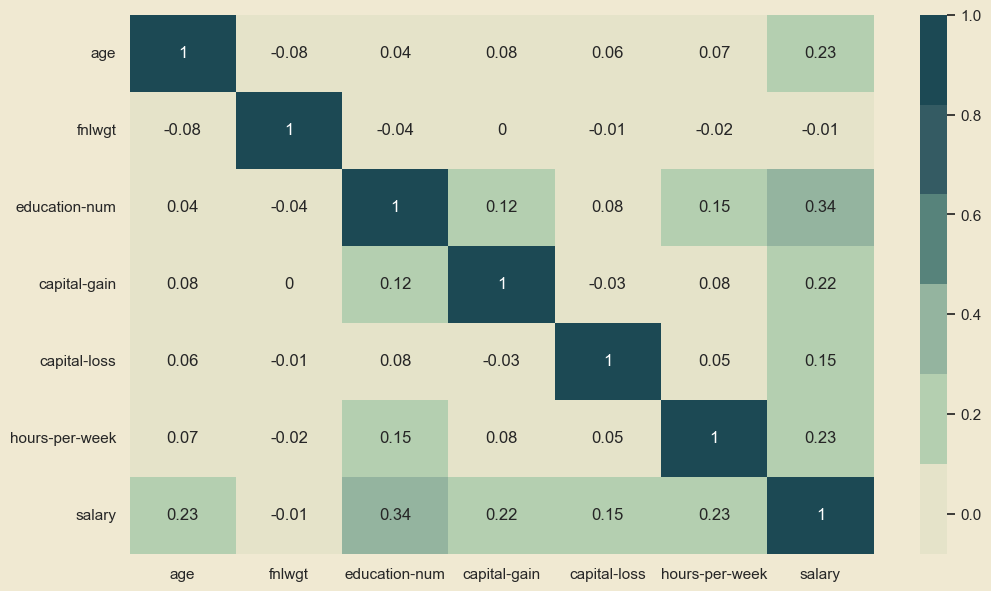

In [28]:
my_palette = sns.color_palette(["#E5E3C9", "#B4CFB0", "#94B49F", '#57837B', '#345B63', "#1c4954"])

correlation = round(data.corr(),2)
plt.figure(figsize = (12,7))

sns.heatmap(correlation, annot = True, cmap = my_palette)
plt.show()

## Machine learning models & prediction

### Train test split

In [29]:
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [30]:
y = data['salary']

data = data.drop('salary', axis=1)
data = data.drop(['education'], axis=1)
categorical_variable = [x for x in data.columns if data[x].dtype == 'object']

In [31]:
data = pd.get_dummies(data, columns=categorical_variable , drop_first=True)


In [32]:
X_train,X_test, y_train,y_test = train_test_split(data, y, test_size=0.2)

In [33]:
X_train.shape

(26029, 85)

In [34]:
X_train.iloc[:, 0:6]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
4984,27,194652,9,0,0,40
10132,18,132986,9,0,0,40
14365,19,188008,10,0,0,20
31877,49,94342,13,0,0,60
5176,25,159662,9,0,0,26
...,...,...,...,...,...,...
19189,35,172694,9,0,0,40
201,19,170653,9,0,0,40
23746,19,37332,9,0,0,20
8640,19,427862,10,0,0,35


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()

In [37]:
# # scaling the columns that are of num. data type
# sc = StandardScaler()
X_train.iloc[:, 0:6] = sc.fit_transform(X_train.iloc[:, 0:6])
X_test.iloc[:, 0:6] = sc.transform(X_test.iloc[:, 0:6])

In [38]:
print('x_train shape:', X_train.shape, '\nx_test shape:', X_test.shape, '\ny_train shape:',y_train.shape, '\ny_test shape:', y_test.shape)

x_train shape: (26029, 85) 
x_test shape: (6508, 85) 
y_train shape: (26029,) 
y_test shape: (6508,)


## Creating and testing models

* I'm going to test several models on our data and see which fits our train data better to later use it on the test data. The models I'm going to use will be:

* Logistic regression
* Decision Tree
* Random forests
* SVM
* SVM(RBF kernel)
* KNN
* Naive Bayes

In [39]:
# Logistic regression model

logst_reg_model = LogisticRegression()
logst_reg_model.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# repeat question
#                     Q1.What is the F1_score?
#                     Q2.Waht is the Precision?
#                     Q3.What is the Recall?
#                     Q4.what is the Sigmoid function?
#                     Q5.Gradient Descent in Logistic Regression?
#                     Q6.Confusion metrix?
                    


In [41]:
# Logistic regression model

logst_reg_model = LogisticRegression()
logst_reg_model.fit(X_train, y_train)
logst_reg_model_y_pred = predict()

In [42]:
logst_reg_confusion

array([[4611,  362],
       [ 607,  928]], dtype=int64)

In [43]:
print("accuracy", logst_reg_accuracy)
print('f1 score: ', logst_reg_f1_score)
print('precision: ', logst_reg_precision)
print('recall: ', logst_reg_recall)

accuracy 0.8511063306699447
f1 score:  0.6569911504424779
precision:  0.7193798449612403
recall:  0.6045602605863192


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# KNN


knn_model = KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski')
# p = 2, metric = 'minkowski' - this is needed to use euclidean distance.
# These are also the default parameters, but here I'm just showing them

knn_model.fit(X_train, y_train)
knn_model_y_pred = knn_model.predict(X_test)
knn_model_confusion = confusion_matrix(y_test, knn_model_y_pred)
knn_model_accuracy = accuracy_score(y_test, knn_model_y_pred)
knn_model_f1_score = f1_score(y_test, knn_model_y_pred)
knn_model_precision = precision_score(y_test, knn_model_y_pred)
knn_model_recall = recall_score(y_test, knn_model_y_pred)

In [46]:
from sklearn.svm import SVC

In [64]:
# Support Vector Machine


svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)
svm_model_y_pred = svm_model.predict(X_test)
svm_model_confusion = confusion_matrix(y_test, svm_model_y_pred)
svm_model_accuracy = accuracy_score(y_test, svm_model_y_pred)
svm_model_f1_score = f1_score(y_test, svm_model_y_pred)
svm_model_precision = precision_score(y_test, svm_model_y_pred)
svm_model_recall = recall_score(y_test,  svm_model_y_pred)



# RBF model


rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_y_pred = rbf.predict(X_test)
rbf_confusion = confusion_matrix(y_test, rbf_y_pred)
rbf_accuracy = accuracy_score(y_test, rbf_y_pred)
rbf_f1_score = f1_score(y_test, rbf_y_pred)
rbf_precision = precision_score(y_test, rbf_y_pred)
rbf_recall = recall_score(y_test, rbf_y_pred)

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
# Naive Bayes


nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)
nb_confusion = confusion_matrix(y_test, nb_y_pred)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_f1_score = f1_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)

In [50]:
from sklearn import tree

In [51]:
# Decision tree

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_confusion = confusion_matrix(y_test,dt_y_pred)
dt_accuracy = accuracy_score(y_test,dt_y_pred)
dt_f1_score = f1_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)


# # decision tree graph
# fig = plt.figure(figsize=(25,20))
 

# no_annotations = tree.plot_tree(dt, 
#                filled=True) 

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Random forast

rf = RandomForestClassifier(n_estimators=10, criterion='entropy') # n_estimators = num of trees
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_confusion = confusion_matrix(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1_score = f1_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)

In [70]:
accuracy = np.array([logst_reg_accuracy, 
                     knn_model_accuracy, 
                     svm_model_accuracy, 
                     rbf_accuracy, 
                     nb_accuracy, 
                     dt_accuracy, 
                     rf_accuracy])

precision = np.array([logst_reg_precision, 
                      knn_model_precision, 
                      svm_model_precision, 
                      rbf_precision, 
                     nb_precision, 
                     dt_precision, 
                     rf_precision])

recall = np.array([logst_reg_recall, 
                  knn_model_recall, 
                  svm_model_recall,
                   rbf_recall,
                  nb_recall, 
                  dt_recall, 
                  rf_recall])

f_1 = np.array([logst_reg_f1_score, 
            knn_model_f1_score, 
            svm_model_f1_score, 
            rbf_f1_score, 
            nb_f1_score,
           dt_f1_score,
           rf_f1_score])


models = np.array(['Logistic Regression', 
                 'KNN', 
                 'SVM', 
                 'Kernel SVM', 
                 'Naive Bayes', 
                 'Decision', 
                 'Random Forests'])

results = pd.DataFrame(np.column_stack((models, accuracy, precision, recall, f_1)),
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [74]:

# Get the row indices of the highest values for each metric after converting into float


print(results['Accuracy'].astype(float).idxmax(), results['Accuracy'][results['Accuracy'].astype(float).idxmax()])
print(results['Precision'].astype(float).idxmax(), results['Precision'][results['Precision'].astype(float).idxmax()])
print(results['Recall'].astype(float).idxmax(), results['Recall'][results['Recall'].astype(float).idxmax()])
print(results['F1 Score'].astype(float).idxmax(), results['F1 Score'][results['F1 Score'].astype(float).idxmax()])

3 0.8566379840196681
3 0.7443181818181818
4 0.9700325732899023
3 0.6628117094325985


In [ ]:
max_accuracy_idx.style.ba

In [84]:
max_accuracy_idx = results['Accuracy'].astype(float).idxmax()
max_precision_idx = results['Precision'].astype(float).idxmax()
max_recall_idx = results['Recall'].astype(float).idxmax()
max_f1_idx = results['F1 Score'].astype(float).idxmax()

In [83]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #ffc107' if v else '' for v in is_max]

highlight_max(results['Accuracy'])

['', '', '', 'background-color: #ffc107', '', '', '']

In [136]:
results.style.background_gradient(cmap='Blues').applymap(lambda x: '', 
                                                         subset=pd.IndexSlice[[max_accuracy_idx, 
                                                                               max_precision_idx, 
                                                                               max_recall_idx, 
                                                                               max_f1_idx], 
                                                                              ['Model']]).apply(highlight_max, subset=pd.IndexSlice[[max_accuracy_idx], ['Accuracy']]
                                                                                        ).apply(highlight_max, subset=pd.IndexSlice[[max_precision_idx], ['Precision']]
                                                                                        ).apply(highlight_max, subset=pd.IndexSlice[[max_recall_idx], ['Recall']]
                                                                                        ).apply(highlight_max, subset=pd.IndexSlice[[max_f1_idx], ['F1 Score']])

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8511063306699447,0.7193798449612403,0.6045602605863192,0.6569911504424779
1,KNN,0.832360172095882,0.6627565982404692,0.5889250814332248,0.6236633321835117
2,SVM,0.8503380454824832,0.7166023166023165,0.6045602605863192,0.6558303886925795
3,Kernel SVM,0.8566379840196681,0.7443181818181818,0.5973941368078176,0.6628117094325985
4,Naive Bayes,0.49784880147510757,0.3160687752069624,0.9700325732899023,0.47678514249119436
5,Decision,0.8228334357713584,0.6187810945273632,0.6482084690553745,0.6331530384982501
6,Random Forests,0.847879532882606,0.7140612725844462,0.5921824104234528,0.6474358974358974


In [117]:
results['Accuracy'][0]

'0.8511063306699447'

In [86]:
pd.IndexSlice[[max_accuracy_idx, max_precision_idx, max_recall_idx, max_f1_idx], ['Model']]

([3, 3, 4, 3], ['Model'])

In [134]:
results.style.background_gradient(cmap='blues').apply()

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8511063306699447,0.7193798449612403,0.6045602605863192,0.6569911504424779
1,KNN,0.832360172095882,0.6627565982404692,0.5889250814332248,0.6236633321835117
2,SVM,0.8503380454824832,0.7166023166023165,0.6045602605863192,0.6558303886925795
3,Kernel SVM,0.8566379840196681,0.7443181818181818,0.5973941368078176,0.6628117094325985
4,Naive Bayes,0.49784880147510757,0.3160687752069624,0.9700325732899023,0.47678514249119436
5,Decision,0.8228334357713584,0.6187810945273632,0.6482084690553745,0.6331530384982501
6,Random Forests,0.847879532882606,0.7140612725844462,0.5921824104234528,0.6474358974358974
